In [1]:
# CVIA Lab Week2 - Code example 1 - Thresholding
# Author: Min Wang
# Created: 2026/02/10

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import time


(np.float64(-0.5), np.float64(3263.5), np.float64(2447.5), np.float64(-0.5))

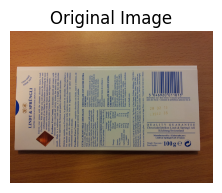

In [2]:
# Load image
myImg = cv2.imread("chocolate_original.jpg")

# OpenCV loads as BGR → convert to RGB for display
myImg = cv2.cvtColor(myImg, cv2.COLOR_BGR2RGB)

plt.figure(1, figsize=(12, 8))
plt.subplot(3, 4, 1)
plt.imshow(myImg)
plt.title("Original Image")
plt.axis("off")

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

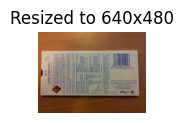

In [3]:
# Resize image to 640x480
# (width, height in OpenCV)
myImgResized = cv2.resize(myImg, (640, 480))

plt.subplot(3, 4, 5)
plt.imshow(myImgResized)
plt.title("Resized to 640x480")
plt.axis("off")


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

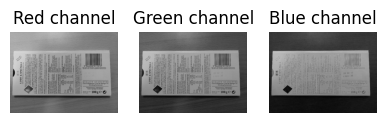

In [4]:
# Separate RGB channels
myImgRed   = myImgResized[:, :, 0]
myImgGreen = myImgResized[:, :, 1]
myImgBlue  = myImgResized[:, :, 2]

plt.subplot(3, 4, 2)
plt.imshow(myImgRed, cmap="gray")
plt.title("Red channel")
plt.axis("off")

plt.subplot(3, 4, 3)
plt.imshow(myImgGreen, cmap="gray")
plt.title("Green channel")
plt.axis("off")

plt.subplot(3, 4, 4)
plt.imshow(myImgBlue, cmap="gray")
plt.title("Blue channel")
plt.axis("off")

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

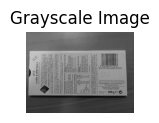

In [5]:
# Convert to grayscale
myImgGray = cv2.cvtColor(myImgResized, cv2.COLOR_RGB2GRAY)

plt.subplot(3, 4, 5)
plt.imshow(myImgGray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

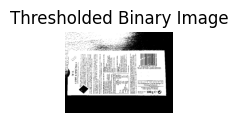

In [6]:
# Otsu Thresholding
levelGray = threshold_otsu(myImgGray)
BW = myImgGray > levelGray

plt.subplot(3, 4, 9)
plt.imshow(BW, cmap="gray")
plt.title("Thresholded Binary Image")
plt.axis("off")


Thresholds: 105 123 105 86


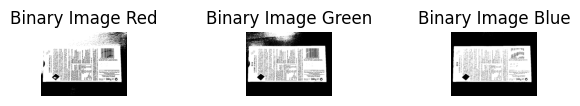

In [11]:
# Red channel
levelRed = threshold_otsu(myImgRed)
BW_Red = myImgRed > levelRed

plt.subplot(4, 5, 6)
plt.imshow(BW_Red, cmap="gray")
plt.title("Binary Image Red")
plt.axis("off")

# Green channel
levelGreen = threshold_otsu(myImgGreen)
BW_Green = myImgGreen > levelGreen

plt.subplot(4, 5, 8)
plt.imshow(BW_Green, cmap="gray")
plt.title("Binary Image Green")
plt.axis("off")

# Blue channel
levelBlue = threshold_otsu(myImgBlue)
BW_Blue = myImgBlue > levelBlue

plt.subplot(4, 5, 10)
plt.imshow(BW_Blue, cmap="gray")
plt.title("Binary Image Blue")
plt.axis("off")

print("Thresholds:",
      levelGray, levelRed, levelGreen, levelBlue)

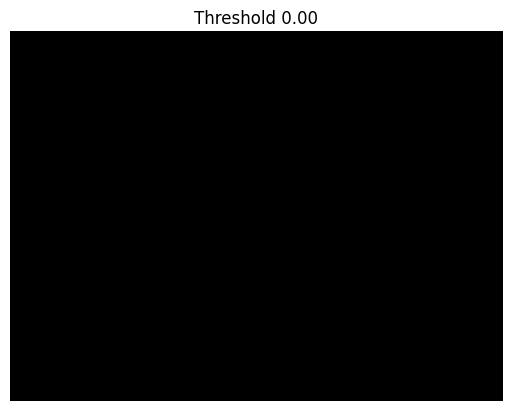

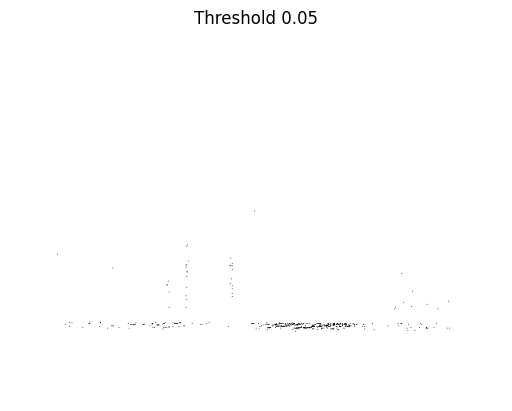

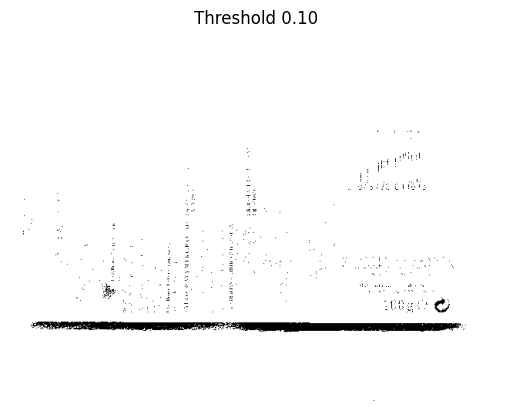

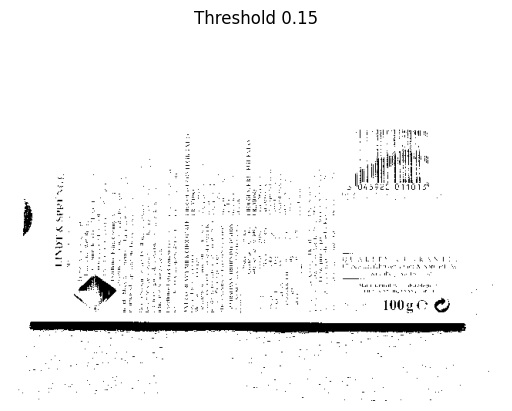

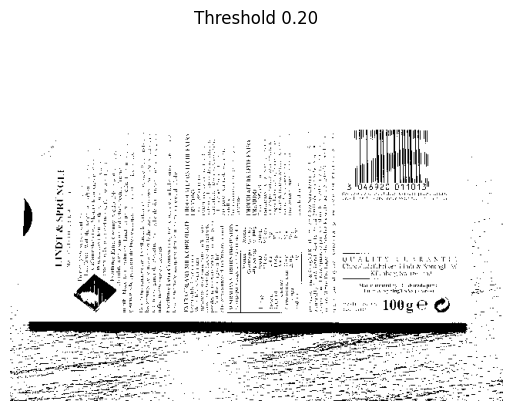

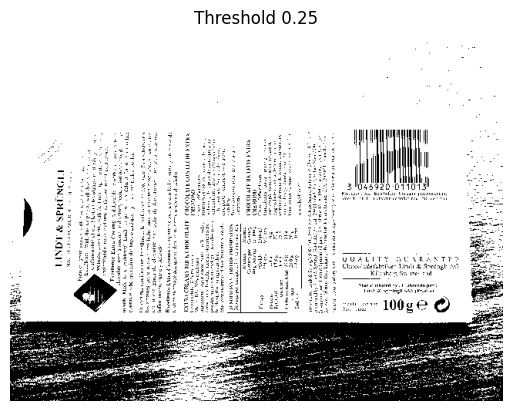

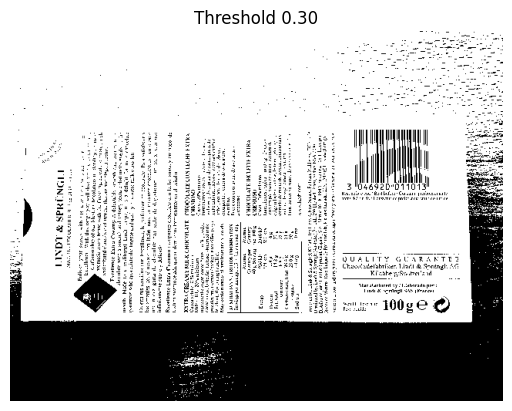

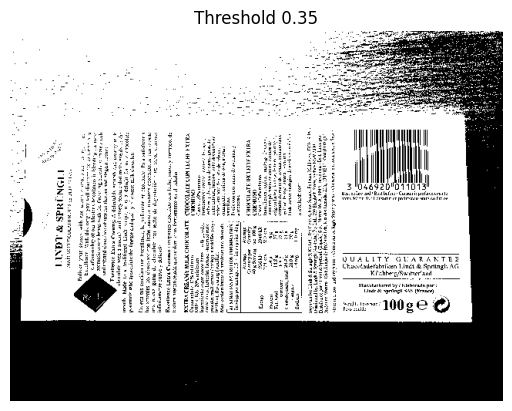

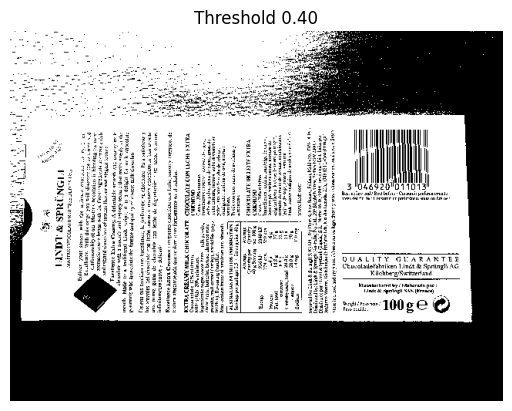

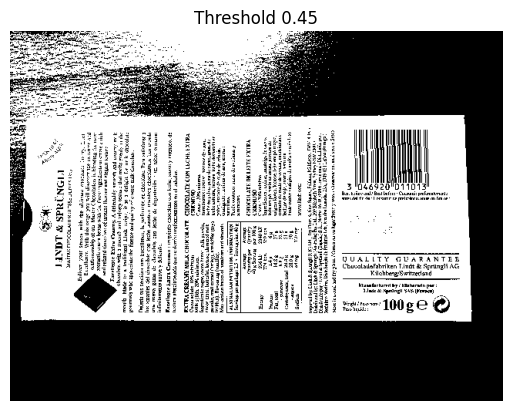

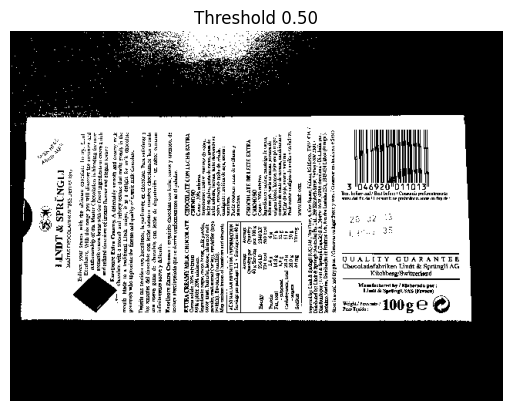

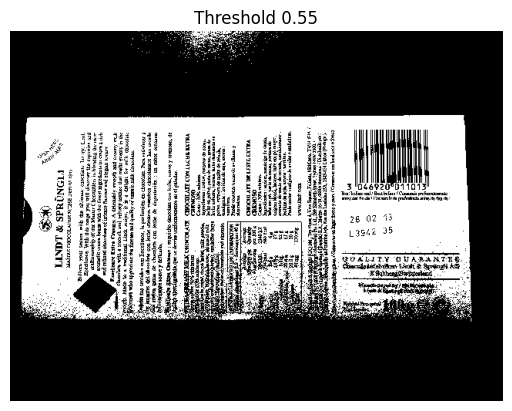

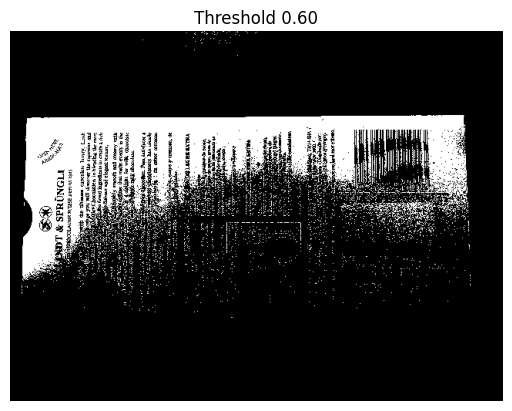

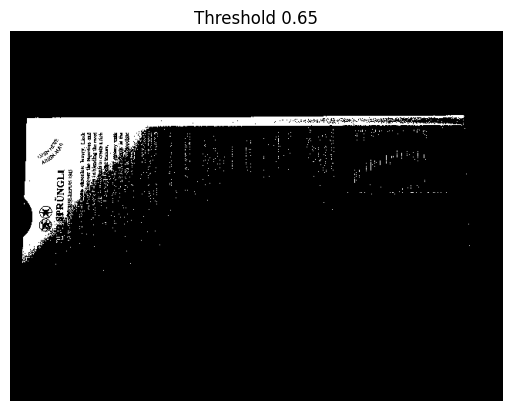

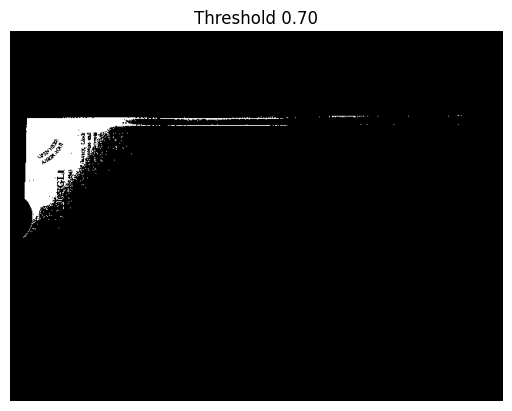

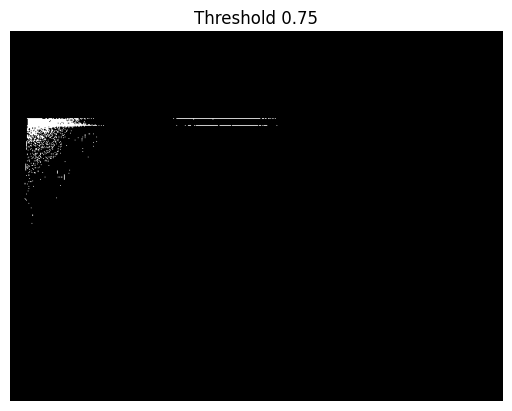

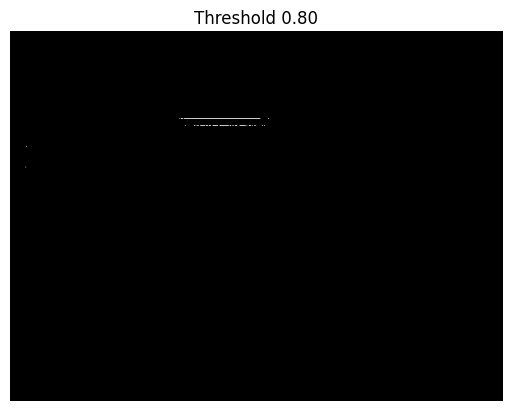

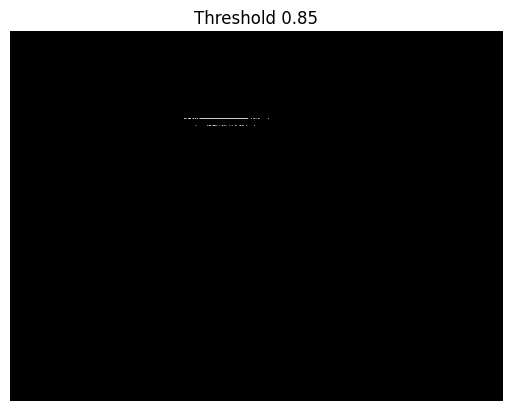

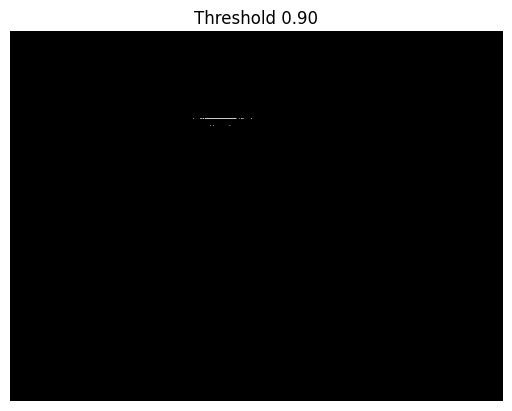

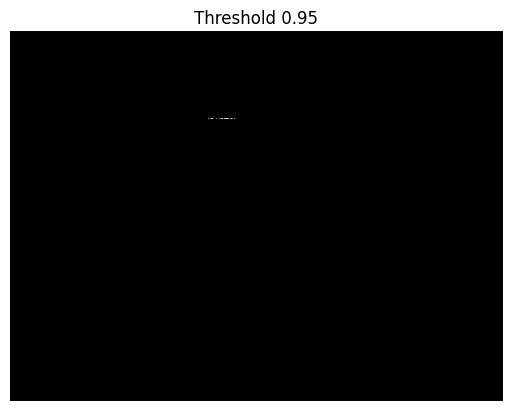

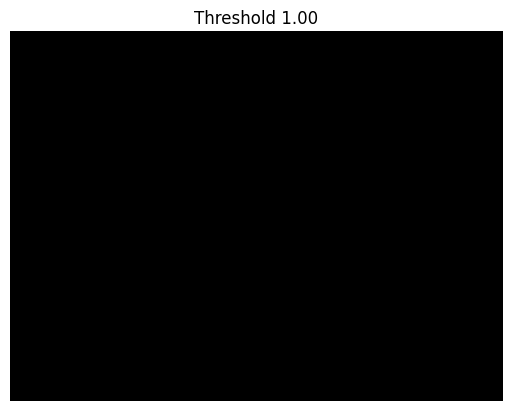

In [12]:
# Loop through thresholds
plt.figure(2)

for iI in np.arange(0.0, 1.01, 0.05):
    # Convert threshold from [0,1] → [0,255]
    thresh_val = int(iI * 255)

    thresholdedImg = myImgGray > thresh_val

    plt.clf()
    plt.imshow(thresholdedImg, cmap="gray")
    plt.title(f"Threshold {iI:.2f}")
    plt.axis("off")
    plt.pause(0.05)

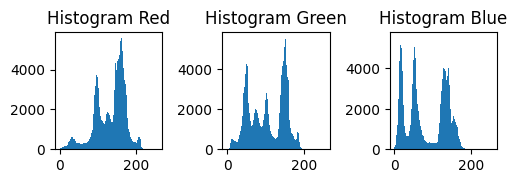

In [13]:
# Histograms
plt.figure(1)

plt.subplot(3, 4, 10)
plt.hist(myImgRed.ravel(), bins=256, range=(0, 255))
plt.title("Histogram Red")

plt.subplot(3, 4, 11)
plt.hist(myImgGreen.ravel(), bins=256, range=(0, 255))
plt.title("Histogram Green")

plt.subplot(3, 4, 12)
plt.hist(myImgBlue.ravel(), bins=256, range=(0, 255))
plt.title("Histogram Blue")

plt.tight_layout()
plt.show()
